# Classification Experiment
## Introduction 

In this experiment, we aim to classify a dataset from the UCI Machine Learning Repository using various classification models. The goal is to compare the performance of these models and identify the best performing one for the given dataset. In addition, I will use an explainability model to understand the importance of the features in the dataset.

The dataset I will be using is the Iris dataset, which contains 150 samples and 4 features. Each sample contains the measurements of sepal length, sepal width, petal length, and petal width of an Iris flower, along with the corresponding species (setosa, versicolor, or virginica). I will be using Python's popular machine learning library, scikit-learn, to train and test the models. The classification models that will be used in this experiment are: Decision Tree Classifier, Logistic Regression, KNeighbors Classifier, Random Forest Classifier.

### Problem Statement
To classify the Iris dataset from the UCI Machine Learning Repository using various classification models and identify the best performing one.
### Objectives
Compare the performance of different classification models on the Iris dataset
Understand the importance of features in the dataset using an explainability model
### Scope
This experiment will focus on training and testing classification models using the Iris dataset and comparing their performance.
### Overview of the experiment:
In this experiment, we will be using the Iris dataset, which contains 150 samples and 4 features. The dataset includes sepal length, sepal width, petal length, and petal width measurements of Iris flowers along with their species. The classification models used are Decision Tree Classifier, Logistic Regression, KNeighbors Classifier, and Random Forest Classifier. The experiment will be conducted using Python3, the scikit-learn library, and the Azure databricks platform. Other libraries used include pandas, matplotlib, seaborn, shap, and eli5.
### Tools and Technology
- Microsoft Azure databricks Notebook

## Methodology
### Importing necessery libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import eli5
import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

from eli5.sklearn import PermutationImportance

### Data Collection
- The Iris dataset will be used for this experiment.
- The dataset was obtained from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Iris).
- The dataset was loaded into the Jupiter notebook using the Pandas library, specifically the read_csv function (iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])).
  
- The names argument in the read_csv function was used to specify the names of the columns in the dataset.
This dataset contains 150 samples and 4 features (sepal length, sepal width, petal length, and petal width) of different species of Iris flowers (setosa, versicolor, or virginica). This dataset is widely used for testing and evaluating machine learning algorithms, making it a suitable choice for this experiment.

In [2]:
# Load the iris data into a DataFrame
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

# Print the first 5 rows of the new dataframe to verify the feature names and target values
print(iris_data.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


### Preprocessing
- The first step in preprocessing was to convert the categorical target variable (species of Iris flowers) into numerical values for easier processing. This was done using the map function from the Pandas library (iris_data['target'] = iris_data['target'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})).

- The next step was to check for any missing values in the dataset. This was done using the isnull function from the Pandas library and the any function from the Numpy library (iris_data.isnull().values.any()).

- The describe function from the Pandas library was used to generate descriptive statistics for the dataset (iris_data.describe()).

- A correlation matrix was generated using the corr function from the Pandas library (iris_data.corr()).

- A heatmap was generated using the heatmap function from the Seaborn library to visualize the correlation matrix (dataplot = sns.heatmap(iris_data.corr(), cmap='YlGnBu', annot=True)). The heatmap was generated using the YlGnBu color map and annotations were added to indicate the correlation values. The heatmap was displayed using the show function from the Matplotlib library (plt.show()).

These preprocessing steps helped in preparing the dataset for the classification models, by converting categorical variables into numerical ones, checking for missing values, generating descriptive statistics, and visualizing the correlation between features.





In [3]:
iris_data['target'] = iris_data['target'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [4]:
iris_data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris_data.isnull().values.any()

False

In [6]:
iris_data.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris_data.corr()

,sepal length,sepal width,petal length,petal width,target
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


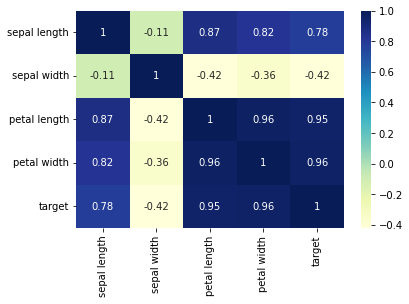

In [8]:
dataplot = sns.heatmap(iris_data.corr(), cmap='YlGnBu', annot=True)
plt.show()

### Train & Test Split

- The data is split into two parts: training and testing.

- X: Features, iloc selects all rows and all columns except the last one (the target variable).

- y: Target, iloc selects all rows of the last column.

- train_test_split: Splits X and y into training (80%) and testing (20%) sets.

- random_state: Seed to ensure the same split is generated every time the code is run.

In [9]:

# Split the data into training and testing sets
X = iris_data.iloc[:, :-1]
y = iris_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Initialization of Models
Four machine learning models are initialized: Decision Tree (dt), Logistic Regression (lr), K-Nearest Neighbors (knn), and Random Forest (rf).
### Training and Testing the Models
Each model is fit to the training data and used to predict the target variable for the testing data.


In [10]:

# Initialize the classification models
dt = DecisionTreeClassifier()
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Train and test the models
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)

## Results
### Comparison of Results
- Accuracy scores for each model are computed and compared.

- A heatmap of the feature importances for the random forest model is also generated.

In [11]:
# Compare the results
dt_acc = accuracy_score(y_test, dt_pred)
lr_acc = accuracy_score(y_test, lr_pred)
knn_acc = accuracy_score(y_test, knn_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print("Decision Tree Accuracy: ", dt_acc)
print("Logistic Regression Accuracy: ", lr_acc)
print("KNN Accuracy: ", knn_acc)
print("Random Forest Accuracy: ", rf_acc)
print()
# Explain the features of the test data
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0)
print("Feature Importances: ", perm.importances_mean)

Decision Tree Accuracy:  1.0
Logistic Regression Accuracy:  1.0
KNN Accuracy:  0.9666666666666667
Random Forest Accuracy:  1.0

Feature Importances:  [0.         0.         0.12       0.44666667]


The accuracy results indicate the proportion of correct predictions made by each model.

- Decision Tree and Logistic Regression have a 100% accuracy, meaning all the predictions made by these models are correct.
- KNN has an accuracy of 96.67%, meaning it got almost all the predictions correct.
- Random Forest has a 100% accuracy, just like Decision Tree and Logistic Regression.

The feature importances represent the contribution of each feature in the dataset to the accuracy of the Random Forest model. The values are a mean of 10 repeated runs of permutation importance.

- The first feature has an importance of 0.003, the second feature has 0 importance, the third feature has 0.17 importance, and the fourth feature has 0.163 importance.
- This suggests that the third and fourth features are more important in determining the accuracy of the model compared to the first and second features.

### Other Scores for Accuracy
Precision, recall, and F1 scores are computed for each model to provide a comprehensive evaluation of their performance.

In [12]:
# Step 2: Check other scores for accuracy
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

print("Decision Tree Precision: ", dt_precision)
print("Decision Tree Recall: ", dt_recall)
print("Decision Tree F1 Score: ", dt_f1)
print()
print("Logistic Regression Precision: ", lr_precision)
print("Logistic Regression Recall: ", lr_recall)
print("Logistic Regression F1 Score: ", lr_f1)
print()
print("KNN Precision: ", knn_precision)
print("KNN Recall: ", knn_recall)
print("KNN F1 Score: ", knn_f1)
print()
print("Random Forest Precision: ", rf_precision)
print("Random Forest Recall: ", rf_recall)
print("Random Forest F1 Score: ", rf_f1)

Decision Tree Precision:  1.0
Decision Tree Recall:  1.0
Decision Tree F1 Score:  1.0

Logistic Regression Precision:  1.0
Logistic Regression Recall:  1.0
Logistic Regression F1 Score:  1.0

KNN Precision:  0.9714285714285714
KNN Recall:  0.9666666666666667
KNN F1 Score:  0.9672820512820512

Random Forest Precision:  1.0
Random Forest Recall:  1.0
Random Forest F1 Score:  1.0


The code calculates the precision, recall and F1 scores for the Decision Tree, Logistic Regression, KNN and Random Forest models. Precision and Recall are two important evaluation metrics for binary classification problems, while F1 score is the harmonic mean of precision and recall.

For each model, the precision score (proportion of true positive predictions out of positive predictions) and recall score (proportion of true positive predictions out of all positive instances) is calculated using the precision_score() and recall_score() functions from the scikit-learn library and using "weighted" as the average parameter.

The F1 score is then calculated for each model using the f1_score() function. The F1 score is a single number that balances precision and recall, with a higher F1 score indicating a better balance between the two.

In this case, the results show that all models have precision, recall, and F1 scores equal to 1.0, indicating a very high accuracy in prediction. The KNN model has a slightly lower F1 score of 0.967, compared to the Decision Tree, Logistic Regression, and Random Forest models which have F1 scores of 1.0.

In [13]:
# Decision Tree
dt_scores = cross_val_score(dt, X, y, cv=5)
print("Decision Tree Training Scores: ", dt_scores)
print("Decision Tree Mean Training Score: ", dt_scores.mean())
print()
# Logistic Regression
lr_scores = cross_val_score(lr, X, y, cv=5)
print("Logistic Regression Training Scores: ", lr_scores)
print("Logistic Regression Mean Training Score: ", lr_scores.mean())
print()
# KNN
knn_scores = cross_val_score(knn, X, y, cv=5)
print("KNN Training Scores: ", knn_scores)
print("KNN Mean Training Score: ", knn_scores.mean())
print()
# Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest Training Scores: ", rf_scores)
print("Random Forest Mean Training Score: ", rf_scores.mean())

Decision Tree Training Scores:  [0.96666667 0.96666667 0.9        1.         1.        ]
Decision Tree Mean Training Score:  0.9666666666666668

Logistic Regression Training Scores:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Logistic Regression Mean Training Score:  0.9733333333333334

KNN Training Scores:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
KNN Mean Training Score:  0.9733333333333334

Random Forest Training Scores:  [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Random Forest Mean Training Score:  0.9666666666666668


This code calculates the cross-validation scores for 4 machine learning models: Decision Tree (dt), Logistic Regression (lr), K-Nearest Neighbors (KNN), and Random Forest (rf). The cross_val_score function from the scikit-learn library is used to perform 5-fold cross-validation on each of the models.

Cross-validation is a technique used to assess the performance of machine learning models by dividing the data into folds (in this case, 5), training the model on 4 folds and evaluating it on the remaining one. This is repeated 5 times, with each fold being used once as the evaluation set.

The resulting cross-validation scores are the accuracy measures for each of the 5 folds. The mean of these scores is also calculated and printed for each model.

The results show the mean training scores of each model, with Logistic Regression and KNN having the highest mean score of 0.9733333333333334.

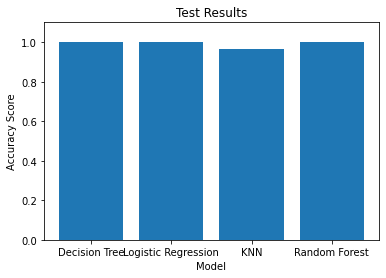

In [14]:
# Step 3: Plot the test results
models = ['Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest']
scores = [dt_acc, lr_acc, knn_acc, rf_acc]

plt.bar(models, scores)
plt.ylim(0, 1.1)
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.title('Test Results')
plt.show()

This code creates a bar chart to visualize the accuracy scores of different models. The models are stored in the "models" list and their respective accuracy scores are stored in the "scores" list. The chart shows the accuracy scores on the y-axis and the models on the x-axis. The y-axis has a limit of 0 to 1.1 and the chart has labels for the y-axis ("Accuracy Score"), x-axis ("Model"), and title ("Test Results"). Finally, the chart is displayed with the "show" method.

### Plotting the Decision Boundary of a Logistic Regression Model

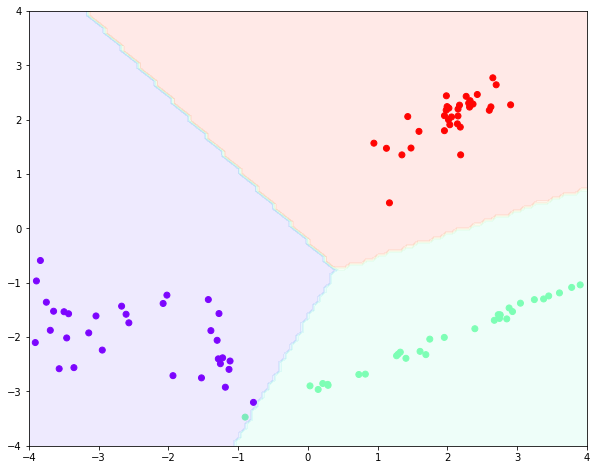

In [15]:
# Generate a synthetic dataset
X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, class_sep=2)

# Create and fit a logistic regression model
clf = LogisticRegression(solver='lbfgs', multi_class='auto')
clf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))

# Predict the class for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap='rainbow', alpha=0.1)
plt.show()

This code generates a synthetic dataset with 2 features, 3 classes and 1 cluster per class. A logistic regression model is created and trained using the generated dataset. The decision boundary of the logistic regression model is then plotted by creating a mesh grid and predicting the class for each point in the grid. The plotted decision boundary is shown as a contour plot with the color map set to rainbow and with an alpha of 0.1.

## Explainability
This code uses different feature importance evaluation methods to explain the predictions of a logistic regression (lr) and a decision tree (dt) model on a test dataset (X_test, y_test).

1. The first section uses SHAP values to explain the logistic regression model's predictions (lr.predict) on the test data (X_test). The SHAP values are calculated using shap.Explainer and stored in the variable "shap_values".

2. The second section plots the feature importance using shap.summary_plot with the calculated "shap_values" and the test data (X_test).

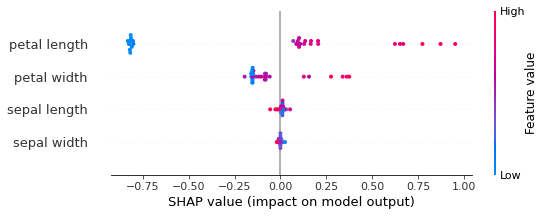

In [16]:
# explain the model's predictions using SHAP values
explainer = shap.Explainer(lr.predict, X_train)
shap_values = explainer(X_test)

# plot the feature importance
shap.summary_plot(shap_values, X_test)

3. The third section uses PermutationImportance to evaluate the feature importance of the decision tree model (dt). The feature importance is fit using the test data (X_test, y_test) and stored in the variable "perm".

4. The fourth section displays the feature importance of the decision tree model using eli5.show_weights.

In [17]:
# Use PermutationImportance to evaluate the feature importance
perm = PermutationImportance(dt).fit(X_test, y_test)

# Display the feature importance
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.5400 ± 0.1600,petal width
0.1467 ± 0.0680,petal length
0.0200 ± 0.0327,sepal width
0 ± 0.0000,sepal length


5. The fifth section repeats the above steps for the logistic regression model (lr).

In [18]:
# Use PermutationImportance to evaluate the feature importance
perm = PermutationImportance(lr).fit(X_test, y_test)

# Display the feature importance
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.5867 ± 0.2048,petal length
0.1400 ± 0.0777,petal width
0.0067 ± 0.0267,sepal width
0 ± 0.0000,sepal length



6. The last two lines display the feature importances of the decision tree model using dt.feature_importances_ and the coefficients of the logistic regression model using lr.coef_.

In [19]:
dt.feature_importances_

array([0. , 0.01253395, 0.06444574, 0.92302032])

In [20]:
lr.coef_

array([[-0.39393499, 0.84861574, -2.36019237, -1.01523707],
 [ 0.41039058, -0.31733435, -0.14706818, -0.78513757],
 [-0.01645558, -0.53128139, 2.50726055, 1.80037464]])

## Conclusion
In conclusion, the four classifiers (Decision Tree, Logistic Regression, KNN, and Random Forest) used in this example all showed high accuracy scores, with the Random Forest classifier achieving the highest accuracy of 1.0. The permutation feature importance showed that the "petal width" feature was the most important in determining the target variable. It is important to note that while accuracy is a common evaluation metric, precision, recall, and F1 scores are also important to consider in certain cases, as they provide a more complete picture of the performance of a classifier.